In [204]:
!pip install pandas
!pip install numpy
!pip install matplotlib 
!pip install seaborn 

In [205]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [206]:
data = pd.read_csv(r"D:\Semantic_Search_Engine\Data\daraz_mobile_products.csv")

In [207]:
data.head()

,title,full_link,price,rating,sold,offer,page_number
0,OnePlus Nord CE 3 5G | 12GB RAM and 256GB ROM ...,https://www.daraz.com.np/products/oneplus-nord...,"Rs. 36,999",22.0,127 sold,31% Off,1
1,"OnePlus Nord CE3 5G |12GB RAM, 256 GB Storage ...",https://www.daraz.com.np/products/oneplus-nord...,"Rs. 36,999",50.0,277 sold,31% Off,1
2,"OnePlus Nord N30SE 5G | 4GB RAM, 128GB Storage...",https://www.daraz.com.np/products/oneplus-nord...,"Rs. 18,999",22.0,142 sold,28% Off,1
3,Benco S1 (8GB+128GB) || Fingerprint || 48MP + ...,https://www.daraz.com.np/products/benco-8gb128...,"Rs. 14,300",7.0,80 sold,16% Off,1
4,"OnePlus Nord N30SE 5G (4/128GB) | 6.72"" FHD+ S...",https://www.daraz.com.np/products/oneplus-nord...,"Rs. 18,999",5.0,57 sold,28% Off,1


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        360 non-null    object 
 1   full_link    360 non-null    object 
 2   price        360 non-null    object 
 3   rating       345 non-null    float64
 4   sold         325 non-null    object 
 5   offer        208 non-null    object 
 6   page_number  360 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 19.8+ KB


In [209]:
data.describe(include='all')

,title,full_link,price,rating,sold,offer,page_number
count,360,360,360,345.000000,325,208,360.000000
unique,160,161,118,NaN,67,30,NaN
top,OnePlus Nord CE 3 5G | 12GB RAM and 256GB ROM ...,https://www.daraz.com.np/products/oneplus-nord...,"Rs. 18,999",NaN,7 sold,1% Off,NaN
freq,5,5,19,NaN,15,38,NaN
mean,NaN,NaN,NaN,11.295652,NaN,NaN,5.000000
std,NaN,NaN,NaN,17.487690,NaN,NaN,2.585582
min,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000
50%,NaN,NaN,NaN,6.000000,NaN,NaN,5.000000
75%,NaN,NaN,NaN,12.000000,NaN,NaN,7.000000


In [210]:
# Check for missing values
print(data.isnull().sum())

title            0
full_link        0
price            0
rating          15
sold            35
offer          152
page_number      0
dtype: int64


In [211]:
# Ensure all values in 'price' column are strings, then remove 'Rs.' and commas, handle missing values
data['price'] = data['price'].astype(str).str.replace('Rs.', '').str.replace(',', '').replace('nan', '0').astype(float)

In [212]:
# Check unique values in the 'sold' column
print(data['sold'].unique())

['127 sold' '277 sold' '142 sold' '80 sold' '57 sold' '60 sold' '260 sold'
 '38 sold' '31 sold' '83 sold' '111 sold' '10 sold' '44 sold' '23 sold'
 '24 sold' '42 sold' '52 sold' '36 sold' '32 sold' '367 sold' '78 sold'
 '21 sold' '27 sold' '17 sold' '50 sold' '62 sold' '45 sold' '70 sold'
 '49 sold' '7 sold' '63 sold' '13 sold' '41 sold' '58 sold' '12 sold'
 '20 sold' nan '34 sold' '14 sold' '18 sold' '16 sold' '73 sold'
 '379 sold' '22 sold' '54 sold' '25 sold' '99 sold' '15 sold' '87 sold'
 '8 sold' '109 sold' '6 sold' '9 sold' '177 sold' '5 sold' '29 sold'
 '30 sold' '121 sold' '103 sold' '33 sold' '59 sold' '26 sold' '48 sold'
 '65 sold' '107 sold' '35 sold' '47 sold' '135 sold']


In [213]:
data['sold'] = pd.to_numeric(data['sold'].str.replace(' sold', ''), errors='coerce')

In [214]:
data['sold'].fillna(0, inplace=True)

C:\Users\Niru Dhaubanjar\AppData\Local\Temp\ipykernel_6392\2471326959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sold'].fillna(0, inplace=True)


In [215]:
# Check the unique values again
print(data['sold'].unique())

# Check for NaN values
print(data['sold'].isna().sum())

# Confirm the data type of the 'sold' column
print(data['sold'].dtype)


[127. 277. 142.  80.  57.  60. 260.  38.  31.  83. 111.  10.  44.  23.
  24.  42.  52.  36.  32. 367.  78.  21.  27.  17.  50.  62.  45.  70.
  49.   7.  63.  13.  41.  58.  12.  20.   0.  34.  14.  18.  16.  73.
 379.  22.  54.  25.  99.  15.  87.   8. 109.   6.   9. 177.   5.  29.
  30. 121. 103.  33.  59.  26.  48.  65. 107.  35.  47. 135.]
0
float64


In [216]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

## Exploratory Data Analysis

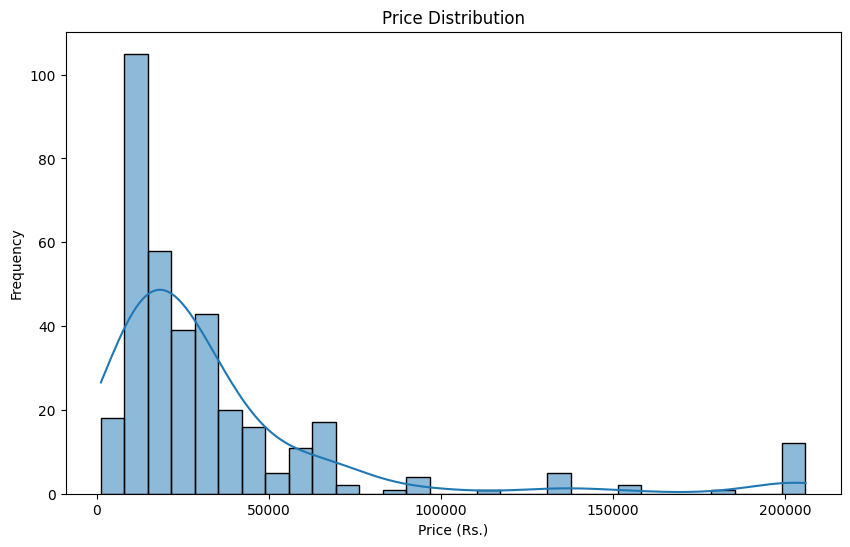

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (Rs.)')
plt.ylabel('Frequency')
plt.show()

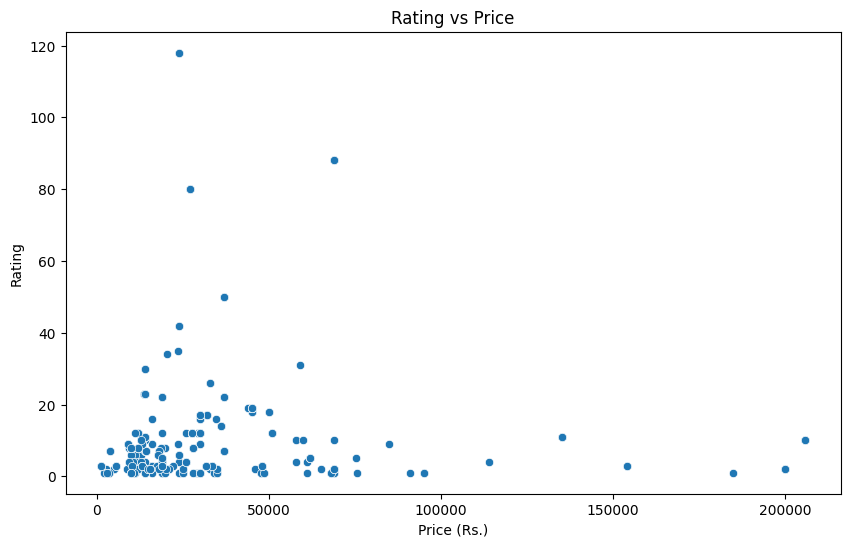

In [218]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='price', y='rating')
plt.title('Rating vs Price')
plt.xlabel('Price (Rs.)')
plt.ylabel('Rating')
plt.show()


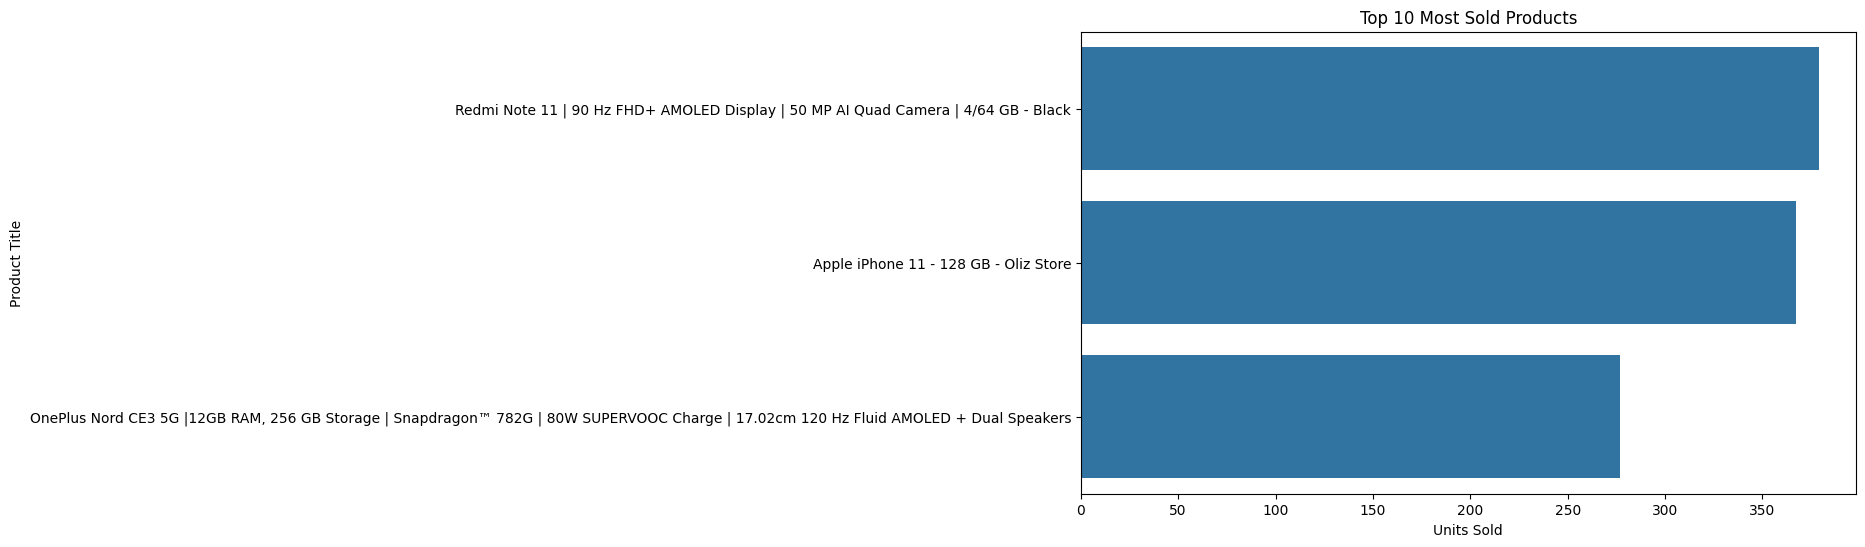

In [219]:
top_sold = data.nlargest(10, 'sold')
plt.figure(figsize=(10, 6))
sns.barplot(x='sold', y='title', data=top_sold)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Units Sold')
plt.ylabel('Product Title')
plt.show()

In [220]:
# Check unique values in the 'offer' column
print(data['offer'].unique())


['31% Off' '28% Off' '16% Off' '4% Off' '10% Off' '29% Off' '32% Off' nan
 '20% Off' '2% Off' '14% Off' '1% Off' '23% Off' '13% Off' '9% Off'
 '5% Off' '6% Off' '15% Off' '42% Off' '3% Off' '40% Off' '25% Off'
 '7% Off' '19% Off' '26% Off' '21% Off' '12% Off' '24% Off' '30% Off'
 '44% Off' '35% Off']


In [221]:
# Remove the ' Off' suffix and convert to int
data['offer_percentage'] = data['offer'].str.replace('% Off', '', regex=False).astype(float)

# Optionally fill NaN values (e.g., you can replace with 0 or drop them)
data['offer_percentage'].fillna(0, inplace=True) 


C:\Users\Niru Dhaubanjar\AppData\Local\Temp\ipykernel_6392\3741062528.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['offer_percentage'].fillna(0, inplace=True)


In [222]:
# Check the unique values in the new 'offer_percentage' column
print(data['offer'].unique())

# Check for NaN values
print(data['offer'].isna().sum())

# Confirm the data type of the 'offer_percentage' column
print(data['offer'].dtype)

['31% Off' '28% Off' '16% Off' '4% Off' '10% Off' '29% Off' '32% Off' nan
 '20% Off' '2% Off' '14% Off' '1% Off' '23% Off' '13% Off' '9% Off'
 '5% Off' '6% Off' '15% Off' '42% Off' '3% Off' '40% Off' '25% Off'
 '7% Off' '19% Off' '26% Off' '21% Off' '12% Off' '24% Off' '30% Off'
 '44% Off' '35% Off']
152
object


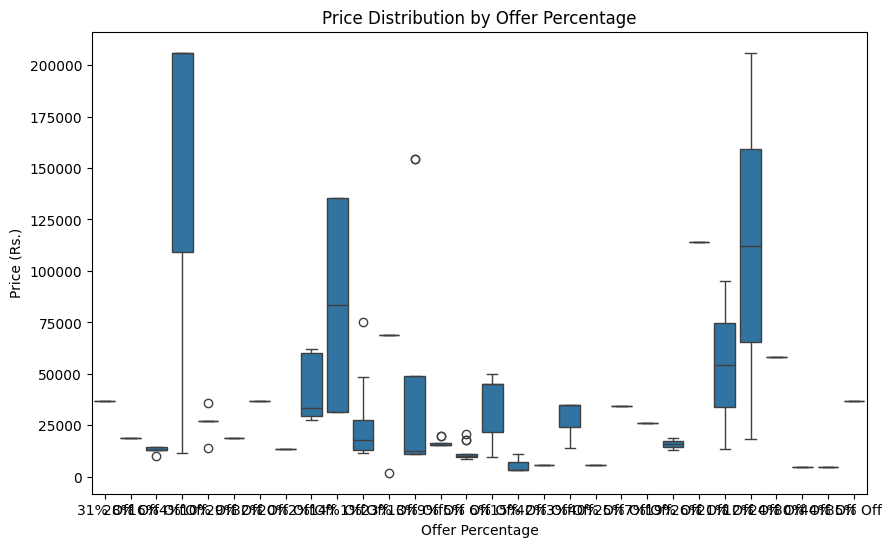

In [223]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='offer', y='price')
plt.title('Price Distribution by Offer Percentage')
plt.xlabel('Offer Percentage')
plt.ylabel('Price (Rs.)')
plt.show()


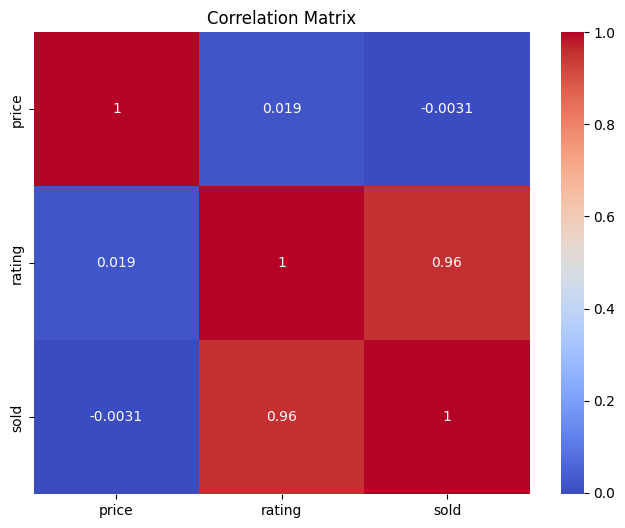

In [224]:
correlation_matrix = data[['price', 'rating', 'sold']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [225]:
data.head()

,title,full_link,price,rating,sold,offer,page_number,offer_percentage
0,OnePlus Nord CE 3 5G | 12GB RAM and 256GB ROM ...,https://www.daraz.com.np/products/oneplus-nord...,36999.0,22.0,127.0,31% Off,1,31.0
1,"OnePlus Nord CE3 5G |12GB RAM, 256 GB Storage ...",https://www.daraz.com.np/products/oneplus-nord...,36999.0,50.0,277.0,31% Off,1,31.0
2,"OnePlus Nord N30SE 5G | 4GB RAM, 128GB Storage...",https://www.daraz.com.np/products/oneplus-nord...,18999.0,22.0,142.0,28% Off,1,28.0
3,Benco S1 (8GB+128GB) || Fingerprint || 48MP + ...,https://www.daraz.com.np/products/benco-8gb128...,14300.0,7.0,80.0,16% Off,1,16.0
4,"OnePlus Nord N30SE 5G (4/128GB) | 6.72"" FHD+ S...",https://www.daraz.com.np/products/oneplus-nord...,18999.0,5.0,57.0,28% Off,1,28.0


In [226]:
data.tail()

,title,full_link,price,rating,sold,offer,page_number,offer_percentage
355,M-Horse Hot30 Play Plus+,https://www.daraz.com.np/products/m-horse-hot3...,9800.0,1.0,7.0,NaN,9,0.0
356,M-HORSE HOT 30 Play 3/64 Ram Room 5000 mAh Bat...,https://www.daraz.com.np/products/m-horse-hot-...,9785.0,8.0,41.0,5% Off,9,5.0
357,"Redmi Note 13 Pro+ 5G (8/256) | 6.67"" CrystalR...",https://www.daraz.com.np/products/redmi-note-1...,44999.0,19.0,58.0,6% Off,9,6.0
358,Colors C8 Kaypad Mobile | New Model | Wireless...,https://www.daraz.com.np/products/colors-c8-ka...,1139.0,3.0,12.0,NaN,9,0.0
359,"Samsung Galaxy A35 5G (8GB/256GB) | 6.6"" Super...",https://www.daraz.com.np/products/samsung-gala...,50999.0,12.0,27.0,2% Off,9,2.0


In [201]:
# Save the cleaned dataset to a CSV file
data.to_csv('cleaned_dataset.csv', index=False) 
